# House Price Predictor

In [118]:
# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Data Cleaning , Understanding and preparation

In [119]:
#import the dataset
pd.options.display.max_rows=5000
data = pd.read_csv("train.csv")

In [120]:
#Read top 5 rows
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [121]:
data.shape

(1460, 81)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [123]:
# Checking for null values
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Few of the features having more value as null, checking for % of null values

In [124]:
null_vals = 100*(data.isnull().sum()/len(data.index))
round(null_vals,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Removing columns with null values more than 80%

In [125]:
data.drop(['MiscFeature','Fence','PoolQC','Alley'],inplace=True, axis=1)

In [126]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [127]:
# Checking if Id has only unique values 
data['Id'].nunique()

1460

In [128]:
# Dropping Id as it has only uniqueue ids which doesnt contribute to the analysis
data.drop(['Id'],inplace=True,axis=1)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### Imputing data based on data dictionary

In [130]:
# Checking for the columns which has only null values
def getNullColumns():
  null_columns = (data.isnull().sum()/len(data))*100
  null_columns = null_columns[null_columns>0]
  null_columns.sort_values(inplace=True)
  return null_columns

In [131]:
getNullColumns()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
dtype: float64

In [132]:
data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [133]:
# filling null values with "NA" -- > "No Fireplace" as per data description
data['FireplaceQu'].fillna('NA',inplace=True) 

In [134]:
data['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [135]:
getNullColumns()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
LotFrontage     17.739726
dtype: float64

In [136]:
def replaceNa(cols, val):
  for col in cols:
    data[col].fillna(val, inplace=True) 

In [137]:
data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [138]:
data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [139]:
data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [140]:
data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [141]:
data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [142]:
data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [143]:
data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [144]:
data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [145]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [146]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [147]:
# fill all the null values of categoreal variable with "NA" as per data description
cols=["GarageCond","GarageQual","GarageQual","GarageFinish","GarageType","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtCond","BsmtQual"]
replaceNa(cols, 'NA')

In [148]:
# replacing with "none" as per data dictionary
replaceNa(["MasVnrType"],'None')

In [149]:
getNullColumns()

Electrical      0.068493
MasVnrArea      0.547945
GarageYrBlt     5.547945
LotFrontage    17.739726
dtype: float64

In [150]:
data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [151]:
# as null values for "Electrical" is very less check for different values
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [152]:
# replace "NAN" with mode values of "Electrical"
# i.e SBrkr
data['Electrical'].fillna('SBrkr', inplace=True)

In [153]:
#Checking for null Columns
getNullColumns()

MasVnrArea      0.547945
GarageYrBlt     5.547945
LotFrontage    17.739726
dtype: float64

In [154]:
# Describe numeric features MasVnrArea,LotFrontage
print("MassVnr Area \n",data['MasVnrArea'].describe(), end = '\n\n')
print("Lot Frontage \n",data['LotFrontage'].describe(), end = '\n\n')
print("Lot Frontage  \n",data['GarageYrBlt'].describe(), end = '\n\n')

MassVnr Area 
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Lot Frontage 
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Lot Frontage  
 count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64



In [155]:
#Identifying outliers in numerical data
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])[['LotFrontage','MasVnrArea','GarageYrBlt']]

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
90%      96.000000   335.000000  2006.000000
95%     107.000000   456.000000  2007.000000
99%     141.000000   791.920000  2009.000000
max     313.000000  1600.000000  2010.000000

In [156]:
#Replacing the null values of numerical variables using median values
data["MasVnrArea"].fillna(data['MasVnrArea'].median(),inplace=True)
data["GarageYrBlt"].fillna(data['GarageYrBlt'].median(),inplace=True)
data["LotFrontage"].fillna(data['LotFrontage'].median(),inplace=True)

In [157]:
getNullColumns()

Series([], dtype: float64)

### Removing Outliers for numeric data

In [158]:
def removeOutLiers(x, col, max, min):
  x = x[x[col]<=max]
  x = x[x[col]>=min]
  return x

<Axes: title={'center': 'Before Cleaning outliers of MasVnrArea'}>

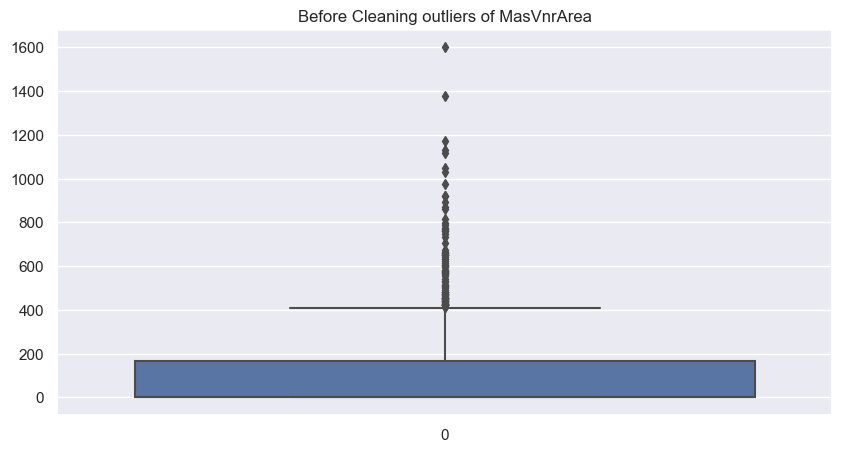

In [159]:
# Remove outliers for MasVnrArea

plt.figure(figsize=(10, 5))
plt.title("Before Cleaning outliers of MasVnrArea")
sns.boxplot(data['MasVnrArea'])

Max val :  410.625
Min val :  -246.375


<Axes: title={'center': 'After Cleaning outliers MasVnrArea:'}>

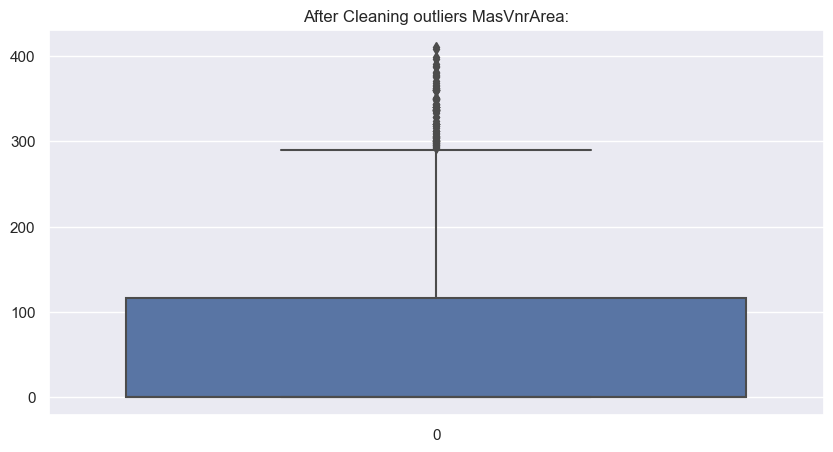

In [160]:
IQR = data["MasVnrArea"].quantile(0.75) - data["MasVnrArea"].quantile(0.25)
max = data["MasVnrArea"].quantile(0.75) + 1.5 * IQR
min = data["MasVnrArea"].quantile(0.25) - 1.5 * IQR

print("Max val : ",max)
print("Min val : ",min)

data = removeOutLiers(data,"MasVnrArea",max,min)

plt.figure(figsize=(10, 5))
plt.title("After Cleaning outliers MasVnrArea:")
sns.boxplot(data['MasVnrArea'])

<Axes: title={'center': 'Before Cleaning outliers LotFrontage:'}>

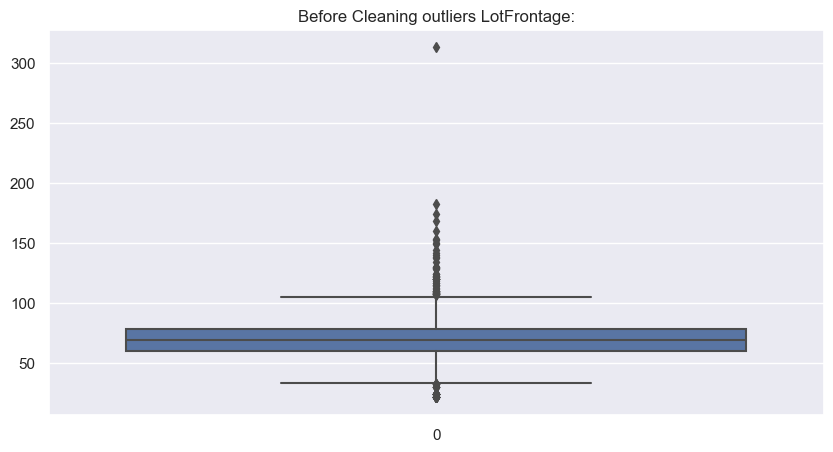

In [161]:
# Remove outliers for LotFrontage

plt.figure(figsize=(10, 5))
plt.title("Before Cleaning outliers LotFrontage:")
sns.boxplot(data['LotFrontage'])

Max val :  105.0
Min val :  33.0


<Axes: title={'center': 'After Cleaning outliers LotFrontage'}>

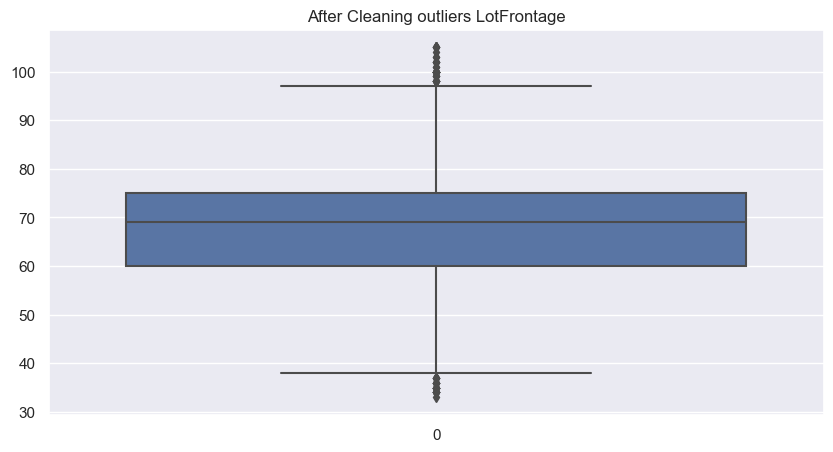

In [162]:
IQR = data["LotFrontage"].quantile(0.75) - data["LotFrontage"].quantile(0.25)
max = data["LotFrontage"].quantile(0.75) + 1.5 * IQR
min = data["LotFrontage"].quantile(0.25) - 1.5 * IQR

print("Max val : ",max)
print("Min val : ",min)

data = removeOutLiers(data,"LotFrontage",max,min)

plt.figure(figsize=(10, 5))
plt.title("After Cleaning outliers LotFrontage")
sns.boxplot(data['LotFrontage'])

### Exploratory Data Analysis on the cleaned Data

In [163]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [164]:
# Check for all numeric data among these variables
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [165]:
# All categorial variables
data.categor=data.select_dtypes(include=['object']).columns.tolist()
print(data.categor)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


##### Taking target variable as "SalePrice" checking against other variables

Text(0, 0.5, 'Sale Price')

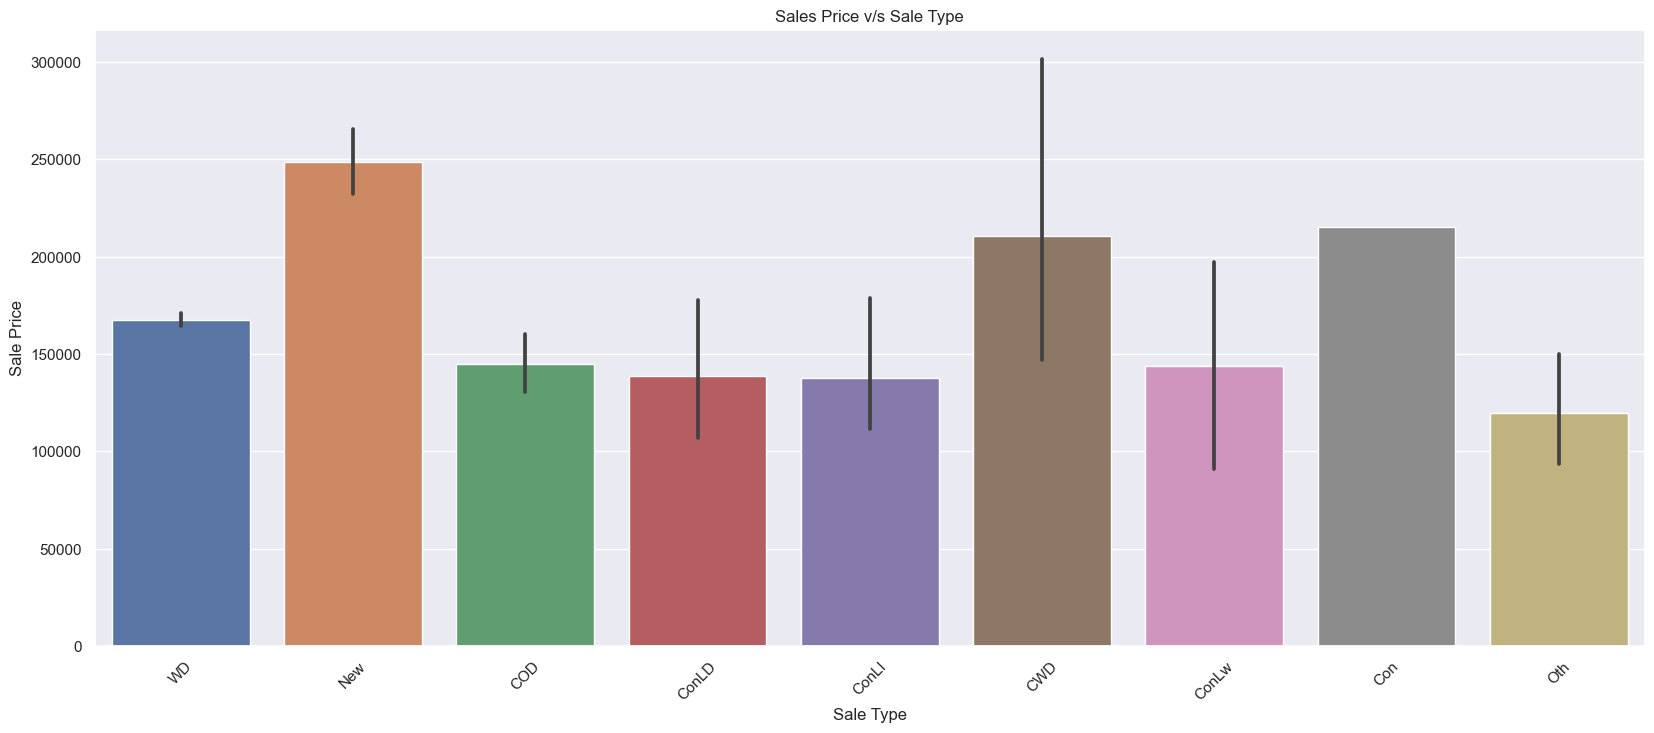

In [166]:
plt.figure(figsize=(20, 8))
sns.barplot(x="SaleType", y="SalePrice", data= data)
plt.title("Sales Price v/s Sale Type")
plt.xticks(rotation=45)
plt.xlabel("Sale Type")
plt.ylabel("Sale Price")

We can observe "Home just constructed and sold" has higher Sale Price compared to other Sale Type 

Text(0, 0.5, 'Sales Price')

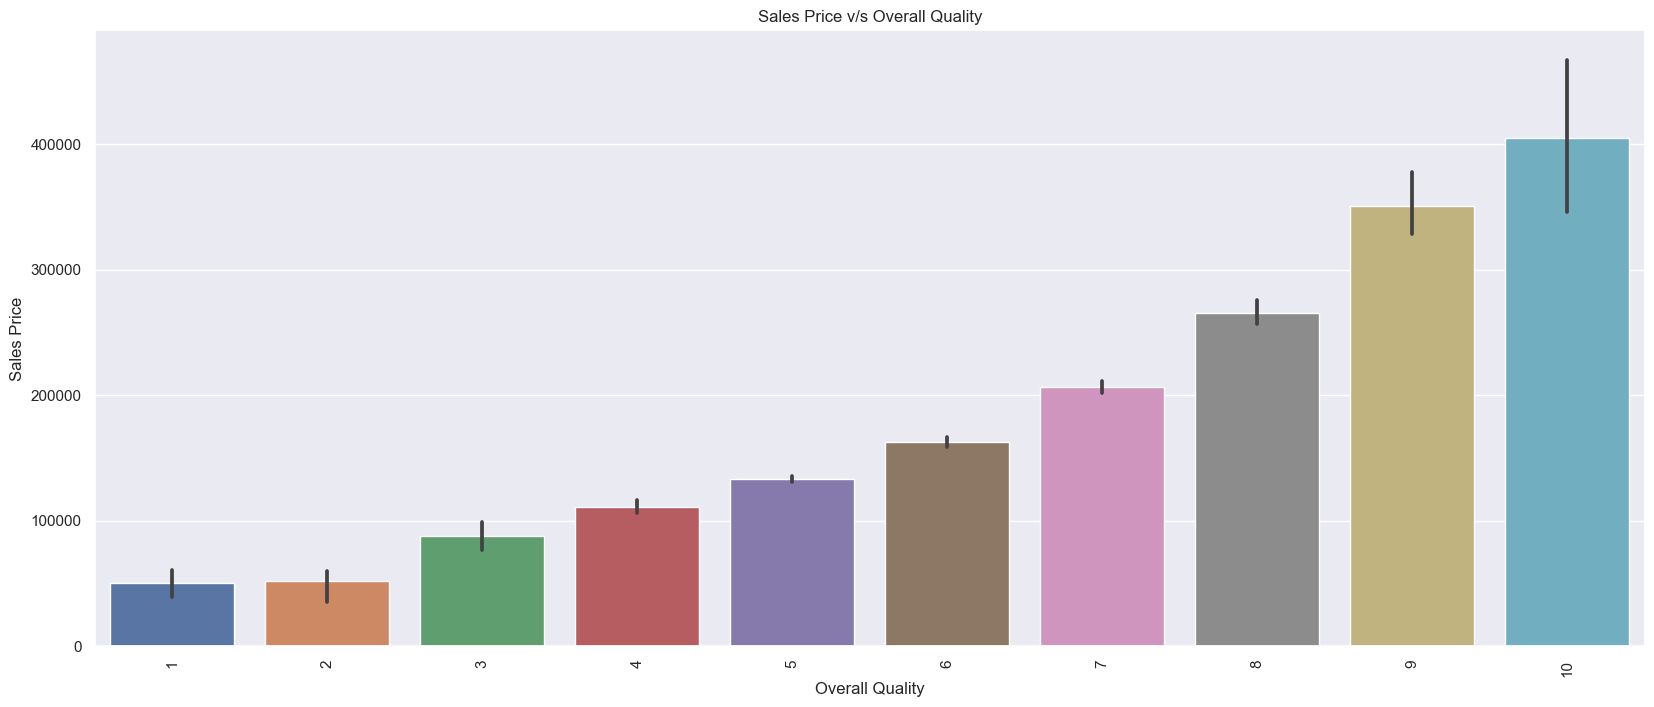

In [167]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price v/s Overall Quality")
plt.xticks(rotation=90)
plt.xlabel("Overall Quality")
plt.ylabel("Sales Price")

We can see Sale Price is directly proportional to Overal Quality 

Text(0, 0.5, 'Sales Price')

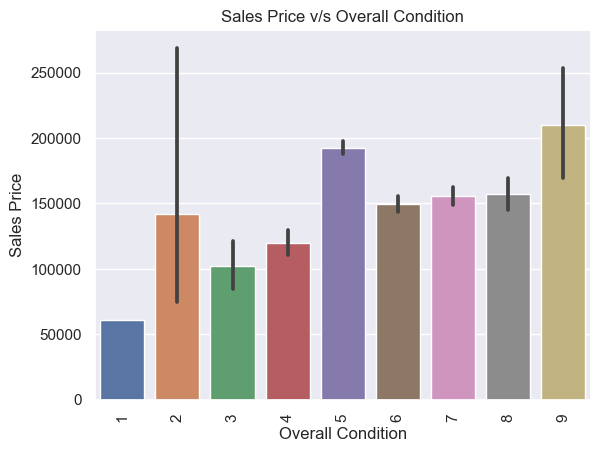

In [168]:
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price v/s Overall Condition")
plt.xticks(rotation=90)
plt.xlabel("Overall Condition")
plt.ylabel("Sales Price")


Text(0, 0.5, 'Sales Price')

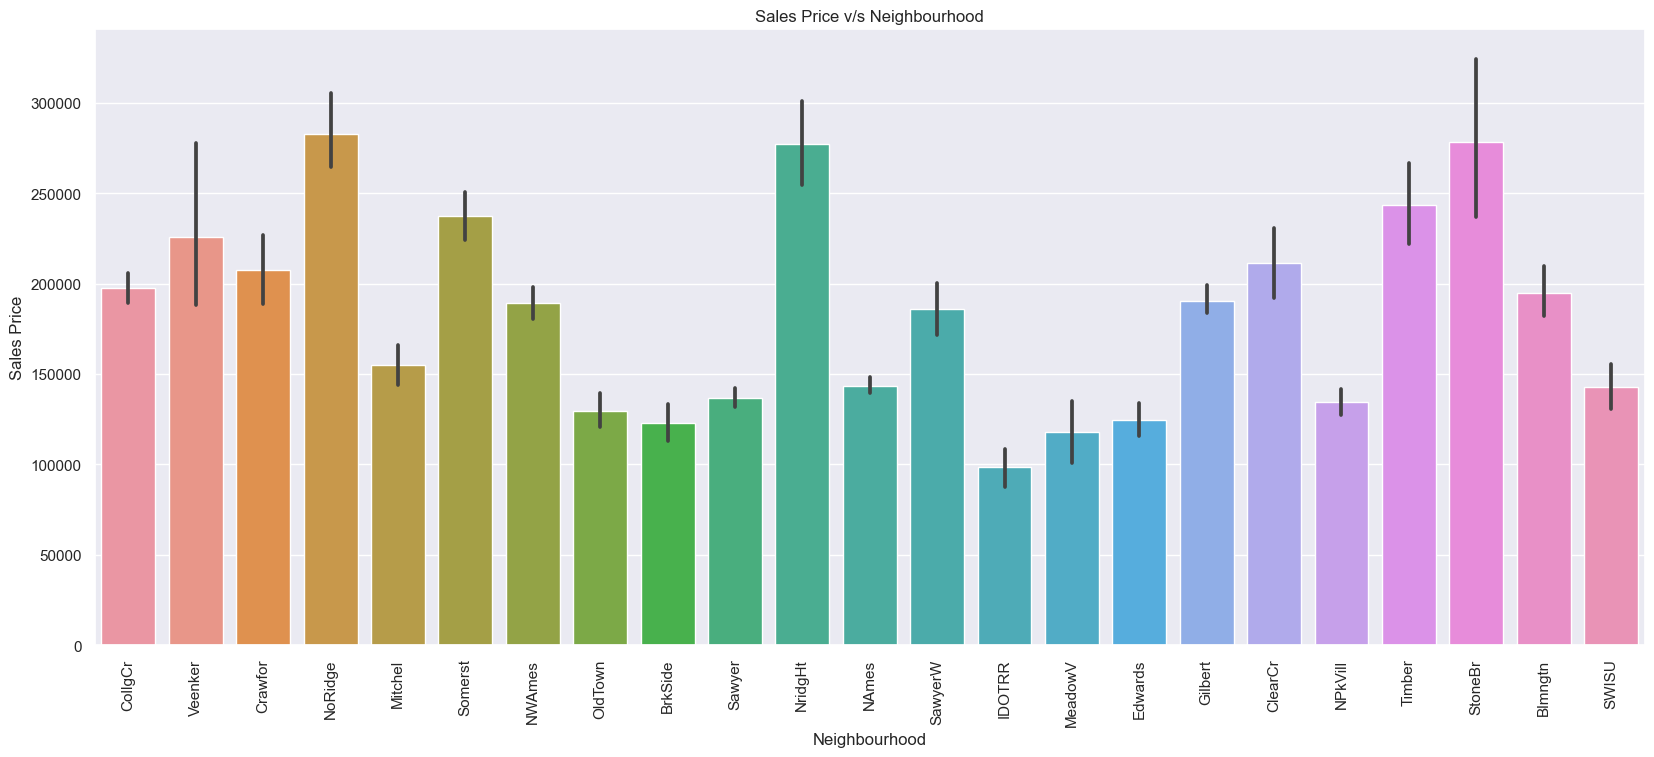

In [169]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price v/s Neighbourhood")
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood")
plt.ylabel("Sales Price")

We observe the variation of Sale Price based on Neighbourhood

Text(0, 0.5, 'Sales Price')

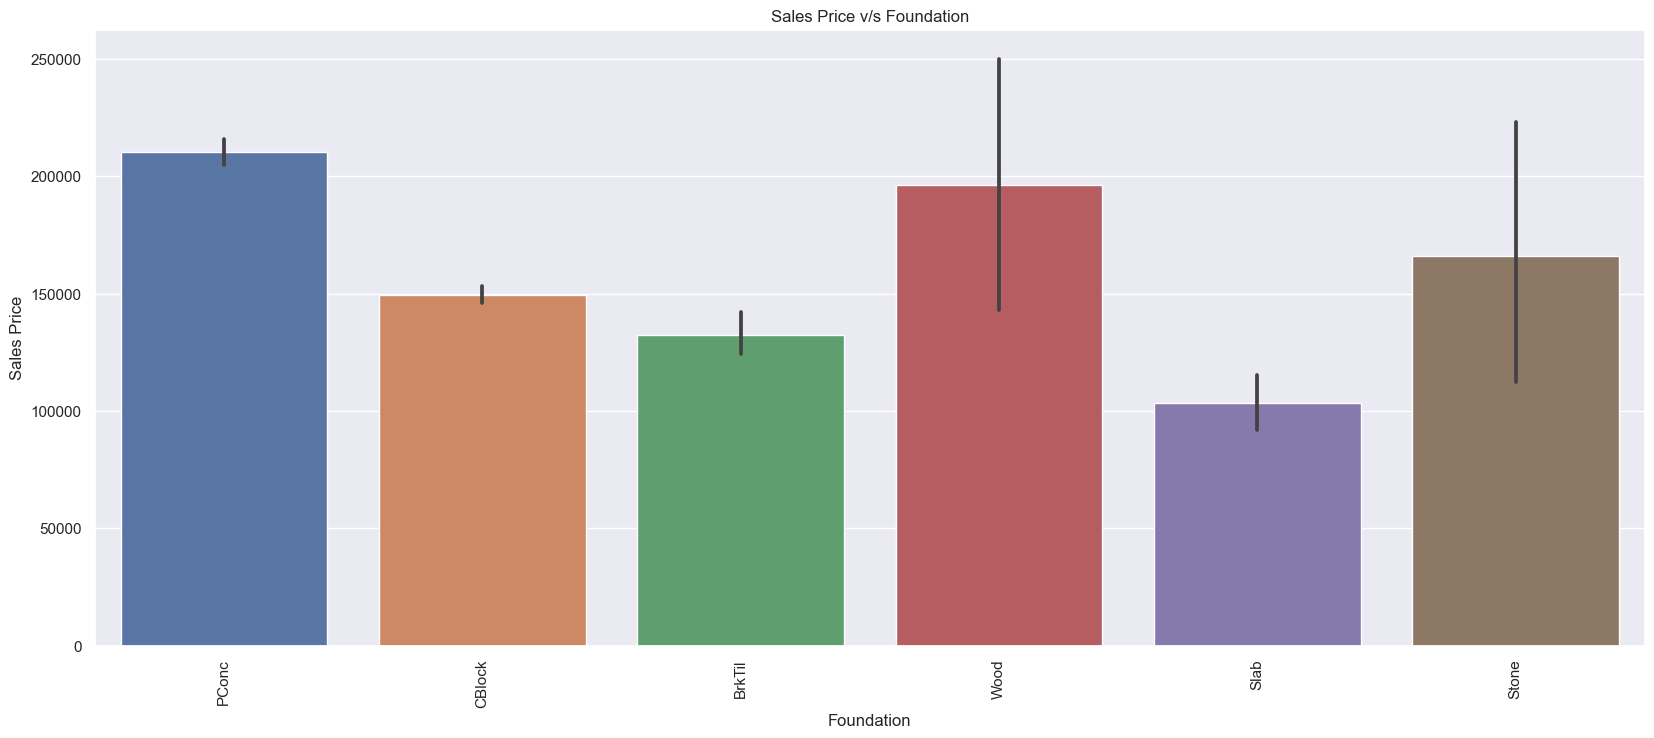

In [170]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Foundation", y="SalePrice", data= data)
plt.title("Sales Price v/s Foundation")
plt.xticks(rotation=90)
plt.xlabel("Foundation")
plt.ylabel("Sales Price")

we can see "Poured Contrete" and "Wood" are having relatively high Sales Price

### Checking correlation

In [171]:
correlation = data.corr()
correlation

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.260769 -0.074338     0.089664    -0.058705   
LotFrontage     -0.260769     1.000000  0.206312     0.199506    -0.049777   
LotArea         -0.074338     0.206312  1.000000     0.064762    -0.012558   
OverallQual      0.089664     0.199506  0.064762     1.000000    -0.059188   
OverallCond     -0.058705    -0.049777 -0.012558    -0.059188     1.000000   
YearBuilt        0.003412     0.169536  0.020093     0.550994    -0.365645   
YearRemodAdd     0.052350     0.062069 -0.003510     0.531533     0.096626   
MasVnrArea      -0.022142     0.269651  0.065624     0.346583    -0.113803   
BsmtFinSF1      -0.042189     0.112117  0.170278     0.172740    -0.040443   
BsmtFinSF2      -0.093298     0.086883  0.075150    -0.040733     0.037964   
BsmtUnfSF       -0.096653     0.088289 -0.023193     0.298868    -0.127303   
TotalBsmtSF     -0.188194     0.249716  0.184333     0.489859    -0.165385   
1stFlrSF        -0.150819     0.292261  0.248767     0.403592    -0.155366   
2ndFlrSF         0.313646     0.084455  0.043786     0.282568     0.044838   
LowQualFinSF     0.056965     0.008906 -0.003686    -0.030863     0.031702   
GrLivArea        0.176518     0.289398  0.220025     0.543502    -0.069796   
BsmtFullBath     0.025975     0.032639  0.145584     0.086770    -0.047729   
BsmtHalfBath     0.006726     0.001411  0.003180    -0.035568     0.118420   
FullBath         0.180732     0.162075  0.103408     0.526168    -0.195357   
HalfBath         0.126922     0.131121  0.052390     0.259204    -0.050821   
BedroomAbvGr     0.039181     0.271636  0.097416     0.093861     0.004739   
KitchenAbvGr     0.341889    -0.004842 -0.014763    -0.180946    -0.097991   
TotRmsAbvGrd     0.143964     0.286615  0.153359     0.381556    -0.056449   
Fireplaces       0.034083     0.131790  0.257000     0.372100    -0.017267   
GarageYrBlt      0.085216     0.085800 -0.027339     0.486523    -0.294411   
GarageCars       0.023179     0.273649  0.153598     0.565969    -0.167969   
GarageArea      -0.024824     0.286583  0.177643     0.516596    -0.130241   
WoodDeckSF       0.033320     0.054748  0.233367     0.182281    -0.000514   
OpenPorchSF      0.014045     0.085537  0.069208     0.294317    -0.018358   
EnclosedPorch    0.016104    -0.059020 -0.034692    -0.121015     0.089514   
3SsnPorch       -0.033372     0.073312  0.029141     0.033371     0.036383   
ScreenPorch     -0.014418     0.060257  0.058650     0.054615     0.062273   
PoolArea         0.009621     0.028977  0.031834     0.010074     0.023001   
MiscVal          0.003272     0.006878  0.044806    -0.029803     0.070497   
MoSold          -0.016077     0.027036  0.011982     0.092116    -0.004238   
YrSold          -0.025554     0.009585 -0.032062    -0.016548     0.043239   
SalePrice       -0.002225     0.313563  0.240716     0.798882    -0.054483   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.003412      0.052350   -0.022142   -0.042189   -0.093298   
LotFrontage     0.169536      0.062069    0.269651    0.112117    0.086883   
LotArea         0.020093     -0.003510    0.065624    0.170278    0.075150   
OverallQual     0.550994      0.531533    0.346583    0.172740   -0.040733   
OverallCond    -0.365645      0.096626   -0.113803   -0.040443    0.037964   
YearBuilt       1.000000      0.574783    0.324456    0.254728   -0.029788   
YearRemodAdd    0.574783      1.000000    0.155804    0.102239   -0.045355   
MasVnrArea      0.324456      0.155804    1.000000    0.226316   -0.051700   
BsmtFinSF1      0.254728      0.102239    0.226316    1.000000   -0.045457   
BsmtFinSF2     -0.029788     -0.045355   -0.051700   -0.045457    1.000000   
BsmtUnfSF       0.128014      0.167563    0.081761   -0.539643   -0.205428   
TotalBsmtSF     0.394147      0.270967    0.304888    0.441253    0.142760   
1stFlrSF        0.270256      0.2046

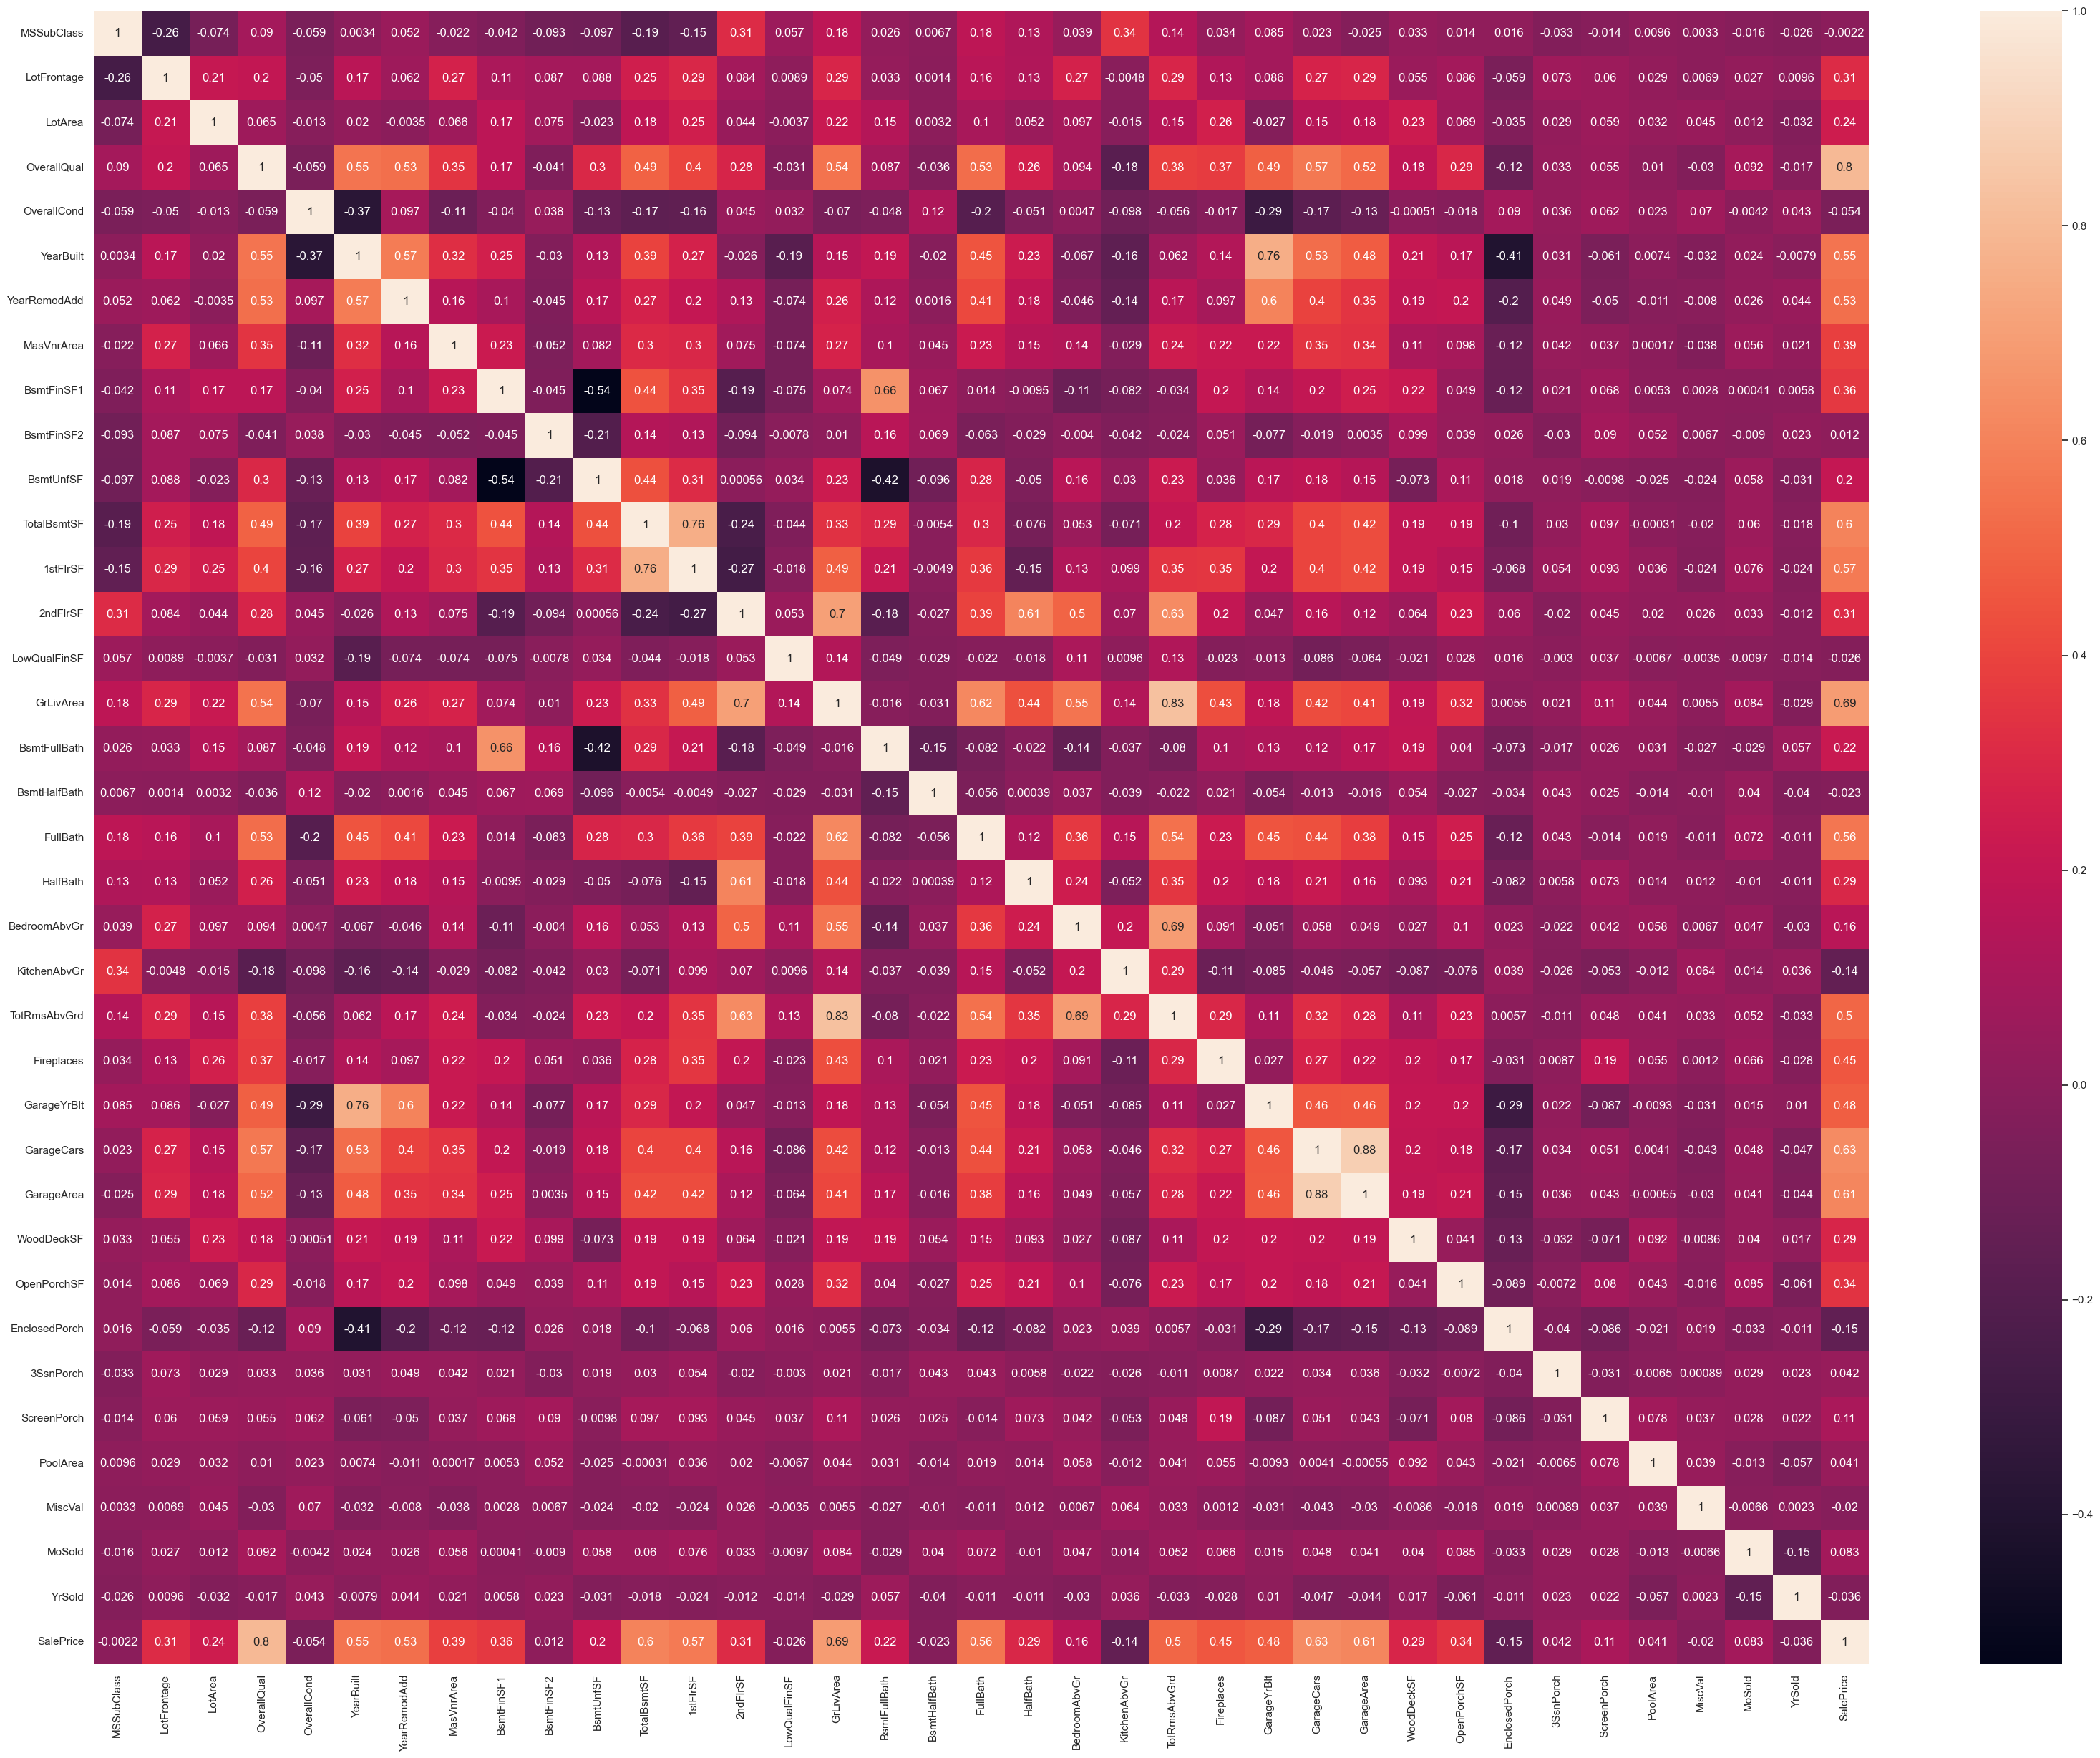

In [172]:
# HeatMap
plt.figure(figsize=(40,30))
sns.heatmap(correlation,annot=True)
plt.show()

From the above heatmap we can see few of the variables are correlated

### We can derive new variable holding age of the house when it was sold

In [173]:
# HouseAge -  House Age from yearsold - yearbuilt
data['HouseAge'] = (2023 - data['YearBuilt'])

In [174]:
correlated_cols=['SalePrice','GarageArea', 'GarageCars','GarageYrBlt', 'YearBuilt','GrLivArea','TotRmsAbvGrd','TotalBsmtSF','1stFlrSF','HouseAge']

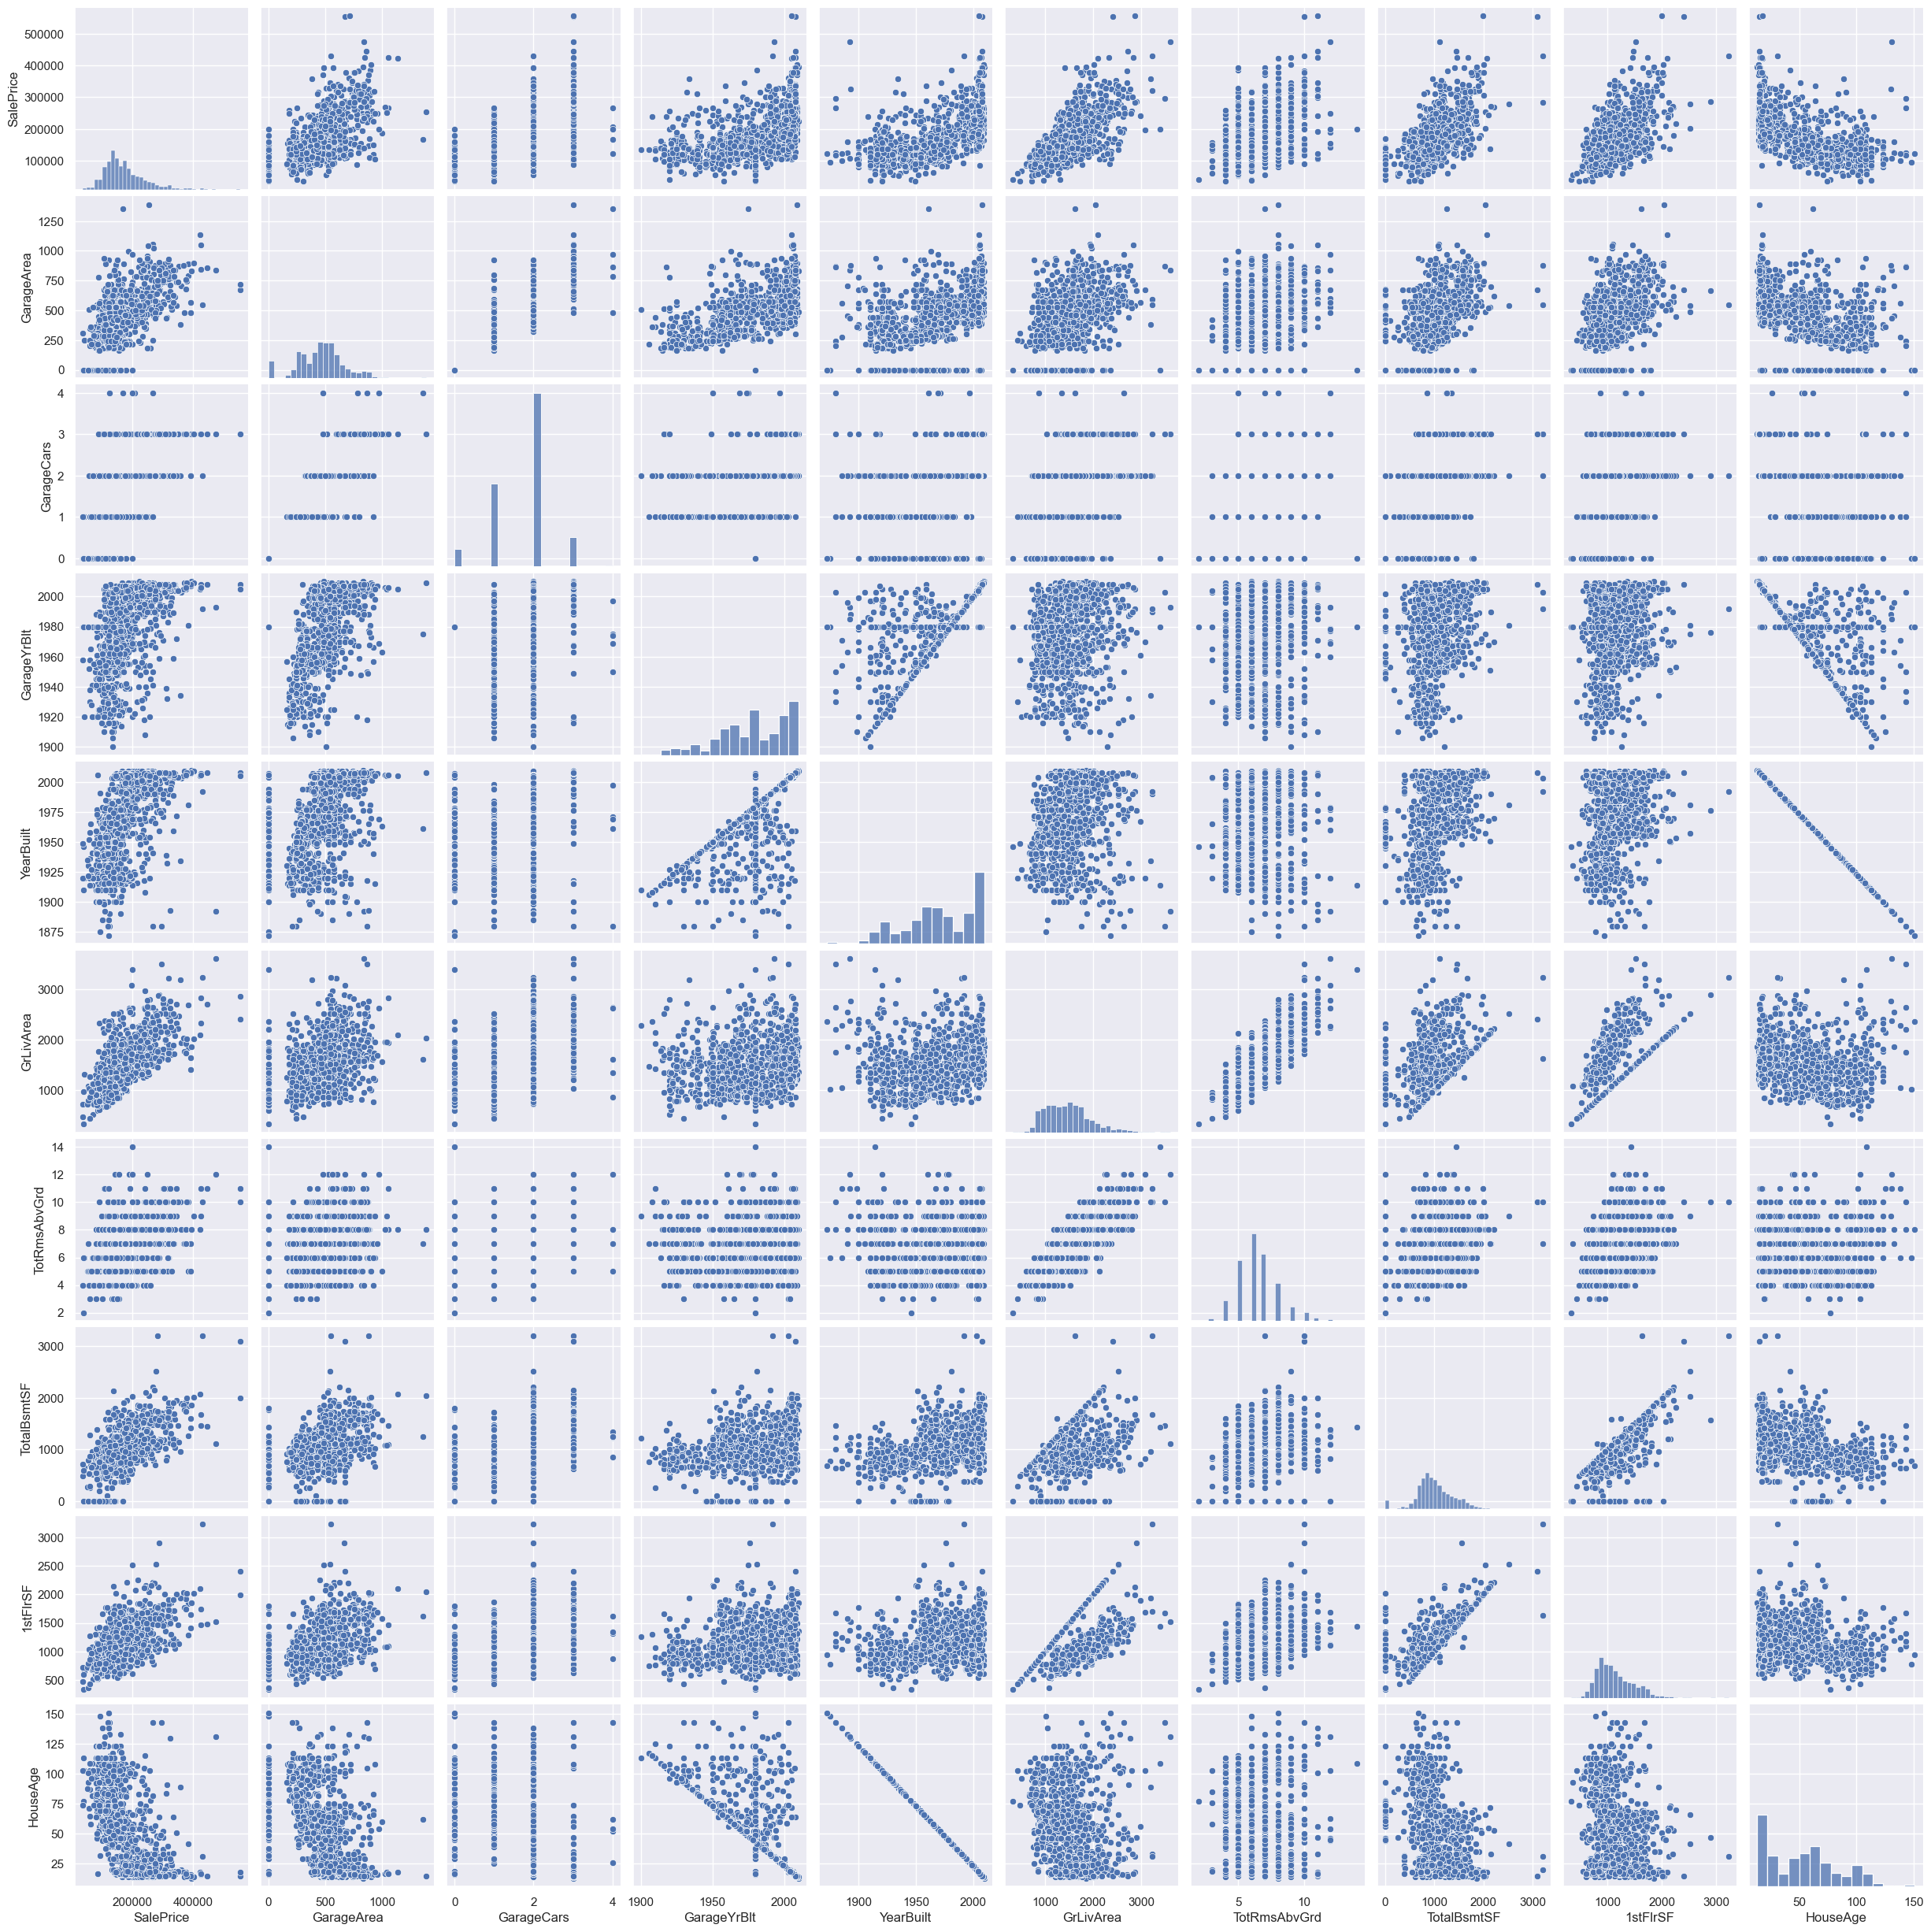

In [175]:
# Checking the correlation with pairplot
sns.set()
sns.pairplot(data[correlated_cols], size = 2.5)
plt.show()

In [176]:
# Dropping the columns which are not contributing for sales Price and dropping one of the columns that are correlated to each other
data.drop(['GarageCars'], axis = 1, inplace=True)
data.drop(['TotRmsAbvGrd'], axis = 1, inplace=True)
data.drop(['1stFlrSF'], axis = 1, inplace=True) 
data.drop(['GarageYrBlt'], axis = 1, inplace=True)   
data.drop(['YearBuilt'], axis = 1, inplace=True)    
data.drop(['MoSold'], axis = 1, inplace=True) 
data.drop(['YearRemodAdd'], axis = 1, inplace=True)

In [177]:
# Check data after removing the columns
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  YrSold  SaleType SaleCondition SalePrice HouseAge  
0        0       0    2008        WD        Normal    208500       20  
1        0       0    2007        WD        Normal    181500       47  
2        0       0    2008        WD        Normal    223500       22  
3        0       0    2006        WD       Abnorml    140000      108  
4        0       0    2008        WD        Normal    250000       23  

[5 rows x 70 columns]

Checking variance for categorial variables

In [178]:
#Printing value counts in each categorical column to see if there's any variance
data.categor=data.select_dtypes(include=['object']).columns.tolist()
for col in data.categor:
  print(data[col].value_counts(),end='\n\n')

RL         1011
RM          175
FV           48
RH           15
C (all)       9
Name: MSZoning, dtype: int64

Pave    1254
Grvl       4
Name: Street, dtype: int64

Reg    806
IR1    417
IR2     30
IR3      5
Name: LotShape, dtype: int64

Lvl    1134
Bnk      53
HLS      40
Low      31
Name: LandContour, dtype: int64

AllPub    1258
Name: Utilities, dtype: int64

Inside     921
Corner     214
CulDSac     80
FR2         40
FR3          3
Name: LotConfig, dtype: int64

Gtl    1193
Mod      54
Sev      11
Name: LandSlope, dtype: int64

NAmes      210
CollgCr    140
OldTown    108
Edwards     90
Sawyer      72
Gilbert     71
NWAmes      66
Somerst     65
SawyerW     57
BrkSide     57
NridgHt     47
Crawfor     44
Mitchel     44
IDOTRR      34
Timber      30
ClearCr     25
SWISU       25
StoneBr     19
NoRidge     17
Blmngtn     17
Veenker      9
MeadowV      7
NPkVill      4
Name: Neighborhood, dtype: int64

Norm      1079
Feedr       73
Artery      43
RRAn        26
PosN        16
RRAe    

Few of the columns shows low variance hence dropping them

In [179]:
data.drop(['Heating','Street','Utilities','Condition2','RoofMatl'],axis=1,inplace=True)

In [180]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... EnclosedPorch 3SsnPorch  ScreenPorch  \
0       Gtl      CollgCr       Norm  ...             0         0            0   
1       Gtl      Veenker      Feedr  ...             0         0            0   
2       Gtl      CollgCr       Norm  ...             0         0            0   
3       Gtl      Crawfor       Norm  ...           272         0            0   
4       Gtl      NoRidge       Norm  ...             0         0            0   

   PoolArea MiscVal YrSold SaleType SaleCondition  SalePrice HouseAge  
0         0       0   2008       WD        Normal     208500       20  
1         0       0   2007       WD        Normal     181500       47  
2         0       0   2008       WD        Normal     223500       22  
3         0       0   2006       WD       Abnorml     140000      108  
4         0       0   2008       WD        Normal     250000       23  

[5 rows x 65 columns]

Variance for numeric variables

In [181]:
# Check for all numeric data among these variables
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.columns
for col in numeric_data:
  print(data[col].value_counts(),end='\n\n')

20     474
60     248
50     135
120     76
30      65
70      57
80      54
90      48
190     29
85      19
160     19
75      15
45      12
40       4
180      3
Name: MSSubClass, dtype: int64

69.0     252
60.0     143
70.0      70
80.0      62
50.0      56
75.0      51
65.0      42
85.0      36
78.0      23
90.0      21
68.0      19
64.0      18
55.0      17
73.0      17
79.0      16
72.0      16
63.0      15
51.0      15
100.0     14
74.0      14
59.0      13
52.0      13
66.0      13
67.0      12
43.0      12
57.0      12
40.0      12
76.0      11
71.0      11
88.0      10
53.0      10
92.0      10
77.0       9
35.0       9
84.0       9
86.0       9
62.0       8
44.0       8
34.0       8
82.0       8
58.0       7
93.0       7
98.0       7
61.0       7
54.0       6
41.0       6
94.0       6
36.0       6
89.0       6
96.0       6
48.0       5
81.0       5
37.0       5
95.0       4
91.0       4
42.0       4
102.0      4
49.0       4
87.0       4
105.0      4
83.0       4
47.0      

In [182]:
# The columns 3SsnPorch, PoolArea & MiscVal has less variance, hence dropping these columns
data.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1,inplace=True)

In [183]:
data.shape

(1258, 62)

After data clean up we have 61 columns ready for building the model

### Data Preparation

Again we shall check for categorial variable and numeric variable

In [184]:
# Check for all numeric data among these variables
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'YrSold', 'SalePrice', 'HouseAge'],
      dtype='object')

In [185]:
numeric_data.columns.value_counts()

MSSubClass       1
LotFrontage      1
SalePrice        1
YrSold           1
ScreenPorch      1
EnclosedPorch    1
OpenPorchSF      1
WoodDeckSF       1
GarageArea       1
Fireplaces       1
KitchenAbvGr     1
BedroomAbvGr     1
HalfBath         1
FullBath         1
BsmtHalfBath     1
BsmtFullBath     1
GrLivArea        1
LowQualFinSF     1
2ndFlrSF         1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
BsmtFinSF1       1
MasVnrArea       1
OverallCond      1
OverallQual      1
LotArea          1
HouseAge         1
dtype: int64

In [186]:
# All categorial variables
data.categor=data.select_dtypes(include=['object']).columns.tolist()
print(data.categor)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [187]:
types = data.dtypes
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     34
int64      26
float64     2
Name: 0, dtype: int64

### Creating dummy variables for categorial data to convert to numeric data

In [188]:
data = pd.get_dummies(data,drop_first=True)
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0         706           0        150          856  ...               0   
1         978           0        284         1262  ...               0   
2         486           0        434          920  ...               0   
3         216           0        540          756  ...               0   
4         655           0        490         1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 215 columns]

In [189]:
data.categor=data.select_dtypes(include=['object']).columns.tolist()
print(data.categor)

[]


In [190]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=215)

In [191]:
#Create new variable "Y" by taking 'SalePrice'
y = data.pop('SalePrice') 
y.tail()

1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

In [192]:
# X will have data excluding "SalePrice"
X = data
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0         706           0        150          856  ...               0   
1         978           0        284         1262  ...               0   
2         486           0        434          920  ...               0   
3         216           0        540          756  ...               0   
4         655           0        490         1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 214 columns]

In [193]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

Check shape for the train and test data

In [194]:
print("X Train Rows",X_train.shape)
print("X Test Rows",X_test.shape)
print("y Train Rows",y_train.shape)
print("y Test Rows",y_test.shape)

X Train Rows (880, 214)
X Test Rows (378, 214)
y Train Rows (880,)
y Test Rows (378,)


In [195]:
from sklearn.preprocessing import StandardScaler

### Rescaling the feature

In [196]:
def getNumColumns(x):
  num_cols = list(x.select_dtypes(include=['int64','int32','float64','float32']).columns)
  return num_cols

In [197]:

scaler = MinMaxScaler()

#Numeric Data
num_vars = list(data.select_dtypes(include=['int64','int32','float64','float32']).columns)
print(num_vars)


# Fit on data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'HouseAge']


In [198]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
284     0.588235     0.236111  0.037114         0.50     0.428571    0.000000   
842     0.352941     0.680556  0.043310         0.50     0.714286    0.446341   
529     0.000000     0.500000  0.188670         0.50     0.142857    0.000000   
175     0.000000     0.708333  0.065408         0.50     0.714286    0.000000   
1213    0.352941     0.500000  0.050846         0.25     1.000000    0.000000   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
284     0.237569    0.000000   0.560725     0.492188  ...               0   
842     0.172376    0.365672   0.135162     0.352187  ...               0   
529     0.673481    0.000000   0.399608     0.635938  ...               0   
175     0.263536    0.000000   0.355044     0.375625  ...               0   
1213    0.358011    0.000000   0.000000     0.202500  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
284                0             0             0            1   
842                0             0             0            1   
529                0             0             0            1   
175                0             0             0            1   
1213               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
284                       0                     0                     0   
842                       0                     0                     0   
529                       0                     1                     0   
175                       0                     0                     0   
1213                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
284                      1                      0  
842                      1                      0  
529                      0                      0  
175                      1                      0  
1213                     1                      0  

[5 rows x 214 columns]

In [199]:
X_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  880.000000   880.000000  880.000000   880.000000   880.000000   
mean     0.199833     0.487942    0.050069     0.498437     0.514610   
std      0.229950     0.192681    0.047745     0.160594     0.163174   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.375000    0.035174     0.375000     0.428571   
50%      0.176471     0.500000    0.044761     0.500000     0.428571   
75%      0.294118     0.583333    0.055659     0.625000     0.571429   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

       MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  ...  \
count  880.000000  880.000000  880.000000  880.000000   880.000000  ...   
mean     0.158348    0.230610    0.031355    0.278592     0.322658  ...   
std      0.258511    0.227965    0.111797    0.209622     0.119470  ...   
min      0.000000    0.000000    0.000000    0.000000     0.000000  ...   
25%      0.000000    0.000000    0.000000    0.112267     0.248047  ...   
50%      0.000000    0.204972    0.000000    0.237757     0.306250  ...   
75%      0.273780    0.381768    0.000000    0.394221     0.393125  ...   
max      1.000000    1.000000    1.000000    1.000000     1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      880.000000      880.000000    880.000000    880.000000   
mean         0.004545        0.004545      0.076136      0.003409   
std          0.067305        0.067305      0.265367      0.058321   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   880.000000             880.000000            880.000000   
mean      0.871591               0.002273              0.005682   
std       0.334735               0.047646              0.075206   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            880.000000            880.000000             880.000000  
mean               0.012500              0.828409               0.078409  
std                0.111166              0.377239               0.268967  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 214 columns]

### Model Building

#### Linear Regression with RFE

In [200]:
lr = LinearRegression()

# Fit a line
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select=50)
rfe = rfe.fit(X_train,y_train)

In [201]:
# Feature selection based on RFE
X_train.columns[rfe.support_]

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageArea', 'HouseAge', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Condition1_RRAe',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'RoofStyle_Shed',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_NA',
       'BsmtFinType1_NA', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ',
       'BsmtFinType2_LwQ', 'BsmtFinType2_NA', 'BsmtFinType2_Rec',
       'BsmtFinType2_Unf', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Sev', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [202]:
#Training Set with RFE variables
X_train_rfe = pd.DataFrame(X_train[X_train.columns[rfe.support_]])
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
284   0.037114         0.50     0.428571    0.237569    0.000000   0.560725   
842   0.043310         0.50     0.714286    0.172376    0.365672   0.135162   
529   0.188670         0.50     0.142857    0.673481    0.000000   0.399608   
175   0.065408         0.50     0.714286    0.263536    0.000000   0.355044   
1213  0.050846         0.25     1.000000    0.358011    0.000000   0.000000   

      TotalBsmtSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  ...  KitchenQual_TA  \
284      0.492188   0.358675         0.250      0.333333  ...               0   
842      0.352187   0.229338         0.375      0.333333  ...               1   
529      0.635938   0.655205         0.500      0.666667  ...               1   
175      0.375625   0.542587         0.500      0.333333  ...               0   
1213     0.202500   0.164669         0.000      0.333333  ...               1   

      Functional_Sev  GarageQual_Fa  GarageQual_Gd  GarageQual_Po  \
284                0              0              0              0   
842                0              0              1              0   
529                0              0              0              0   
175                0              0              0              0   
1213               0              0              0              0   

      GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_Po  \
284               1              0              0              0   
842               0              0              1              0   
529               1              0              0              0   
175               1              0              0              0   
1213              1              0              0              0   

      GarageCond_TA  
284               1  
842               0  
529               1  
175               1  
1213              1  

[5 rows x 50 columns]

In [203]:
# predict y_training data
y_train_pred = lr.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9417434521479774

In [204]:
y_test_pred = lr.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.41502263007382e+17

Looking at R2 value of training data and test data,training data predicted 95% but test data prediction is too low(-1.0856).So building the model with Lasso/Ridge Regression

In [205]:
lr_metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 Train : ",r2_train_lr)
lr_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 Test : ",r2_test_lr)
lr_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print("Residual Sum Squared Train : ",rss1_lr)
lr_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print("Residual Sum Squared Test : ",rss2_lr)
lr_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error Train:",mse_train_lr)
lr_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error Test:",mse_test_lr)
lr_metric.append(mse_test_lr**0.5)

R2 Train :  0.9417434521479774
R2 Test :  -3.41502263007382e+17
Residual Sum Squared Train :  219110843403.1253
Residual Sum Squared Test :  5.678436031853422e+29
Mean Squared Error Train: 248989594.77627876
Mean Squared Error Test: 1.5022317544585773e+27


### Model Building & Evaluation using Ridge and Lasso

In [206]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [207]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [208]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha_val = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha_val)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.40140548e+04  1.22432942e+04  1.93246008e+04  5.14987834e+04
  2.93113116e+04  9.07797189e+02  4.52294892e+04  1.39967851e+04
  1.95026186e+04  4.44753075e+04  3.52158394e+04  9.14383528e+03
  8.00656568e+04  9.44490133e+03 -4.40380058e+03  1.30683120e+04
  7.83783437e+03 -4.91665999e+03 -8.16862514e+03  2.16942030e+04
  2.88200505e+04  1.42344758e+04  1.29320832e+04  8.03300141e+03
  1.78834364e+04 -2.84155351e+03 -1.81475992e+04  5.61194356e+03
  8.35152432e+03  1.14201595e+04  3.83213534e+03  1.07503277e+04
 -4.07310905e+03 -2.48555520e+02  4.13565672e+03 -3.40903247e+03
 -3.50025694e+03  5.46220252e+03 -3.43877765e+03 -3.33418174e+03
  2.37155971e+01 -3.47174788e+03 -1.42169706e+04  5.91155430e+03
 -3.83211704e+03 -6.70443716e+03  1.72266013e+04 -7.74961930e+03
 -1.03323192e+04 -5.73376972e+03 -1.20496798e+04 -1.08491727e+04
 -7.75863460e+03  4.94290846e+03 -6.82535298e+03  1.56915720e+04
  1.10662815e+04 -5.52408339e+03 -6.71019959e+03 -3.32094186e+03
 -9.50933758e+02  1.08651

In [209]:
# Calculating Metrics Such as r2, mean_squared_error
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train : ",r2_train_lr)
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test : ",r2_test_lr)
ridge_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum Squared Train : ",rss1_lr)
ridge_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum Squared Test : ",rss2_lr)
ridge_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train:",mse_train_lr)
ridge_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error Test:",mse_test_lr)
ridge_metric.append(mse_test_lr**0.5)

R2 Train :  0.9269326364766757
R2 Test :  0.8923161244195414
Residual Sum Squared Train :  274816346610.59845
Residual Sum Squared Test :  179054742935.1819
Mean Squared Error Train: 312291302.96658915
Mean Squared Error Test: 473689796.1248198


We can see 2 value of Train and Test difference is less

Text(0.5, 0, 'Errors')

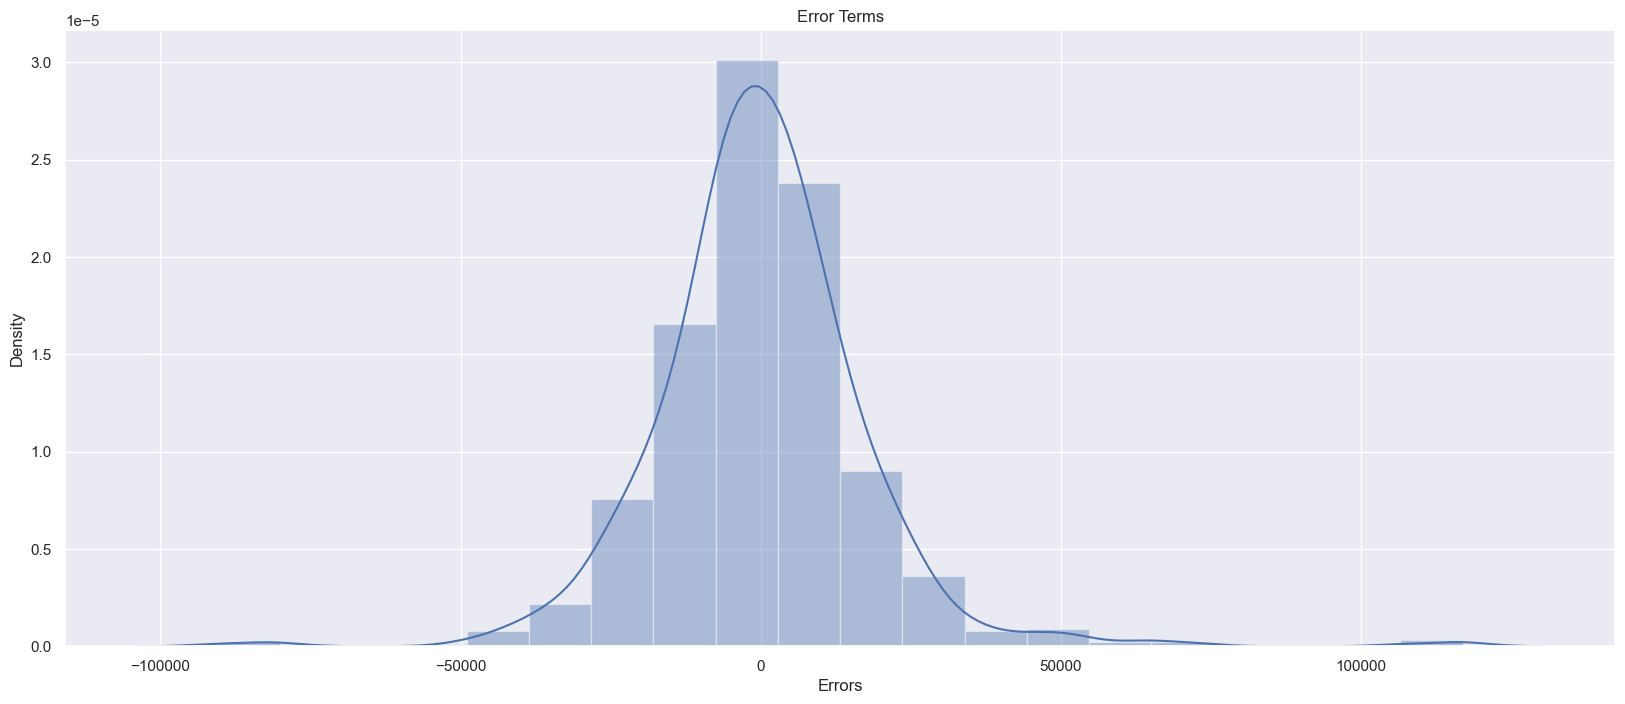

In [210]:
#Checking if error terms are normally distributed
plt.figure(figsize=(20, 8))
sns.distplot((y_train - y_pred_train), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')  

#### Doubling Alpha value

In [211]:
alpha = alpha_val*2
print(alpha)
double_ridge = Ridge(alpha=alpha)

double_ridge.fit(X_train, y_train)

6.0


Ridge(alpha=6.0)

In [212]:
# Metrics
y_pred_train = double_ridge.predict(X_train)
y_pred_test = double_ridge.predict(X_test)

ridge_double_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train : ",r2_train_lr)
ridge_double_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test : ",r2_test_lr)
ridge_double_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum Squared Train : ",rss1_lr)
ridge_double_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum Squared Test : ",rss2_lr)
ridge_double_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train:",mse_train_lr)
ridge_double_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error Test:",mse_test_lr)
ridge_double_metric.append(mse_test_lr**0.5)

R2 Train :  0.9185937798868963
R2 Test :  0.8874844747430647
Residual Sum Squared Train :  306179926633.3175
Residual Sum Squared Test :  187088720038.16974
Mean Squared Error Train: 347931734.81058806
Mean Squared Error Test: 494943703.80468184


In [213]:
ridge_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }
#ridge_metric = pd.DataFrame(ridge_table ,columns = ['Metric', 'Linear Regression'] )
ridge_metric_cols = pd.DataFrame(ridge_table,columns = ['Metric'])
optimalAplha = pd.Series(ridge_metric, name = 'Aplha=3')
doubleAplha = pd.Series(ridge_double_metric, name = 'Aplha=6')
final_ridge_metric = pd.concat([ridge_metric_cols,optimalAplha, doubleAplha], axis = 1)
final_ridge_metric

Metric       Aplha=3       Aplha=6
0  R2 Score (Train)  9.269326e-01  9.185938e-01
1   R2 Score (Test)  8.923161e-01  8.874845e-01
2       RSS (Train)  2.748163e+11  3.061799e+11
3        RSS (Test)  1.790547e+11  1.870887e+11
4       MSE (Train)  1.767177e+04  1.865293e+04
5        MSE (Test)  2.176442e+04  2.224733e+04

## Lasso

In [214]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [215]:
print(model_cv.best_params_)

{'alpha': 100}


In [216]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha_lasso =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [219]:
lasso.coef_

array([-2.00452000e+04,  8.68682204e+03,  0.00000000e+00,  7.04997955e+04,
        3.36726004e+04,  0.00000000e+00,  3.06966269e+04,  0.00000000e+00,
       -0.00000000e+00,  5.84878510e+04,  6.91141769e+03, -0.00000000e+00,
        1.47390030e+05,  5.84415797e+03, -0.00000000e+00, -0.00000000e+00,
        2.68139645e+03, -4.93589737e+02, -5.49034970e+03,  1.21466768e+04,
        2.71093851e+04,  1.23603797e+04,  4.94866366e+03,  1.06126033e+03,
        1.35316770e+04, -1.06132558e+03, -2.63683250e+04,  0.00000000e+00,
        0.00000000e+00,  6.73548935e+03, -0.00000000e+00,  9.48094641e+03,
       -0.00000000e+00, -1.02746586e+03,  3.99618163e+03, -0.00000000e+00,
       -0.00000000e+00,  2.89490797e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  7.11122000e+03,
        0.00000000e+00, -2.36574011e+02,  1.92052118e+04, -5.77286863e+02,
       -1.18870901e+03, -0.00000000e+00, -0.00000000e+00, -3.76277850e+03,
       -1.79534290e+03,  

In [220]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train : ",r2_train_lr)
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test : ",r2_test_lr)
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum Squared Train : ",rss1_lr)
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum Squared Test : ",rss2_lr)
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train:",mse_train_lr)
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error Test:",mse_test_lr)
metric_lasso.append(mse_test_lr**0.5)

R2 Train :  0.9183758389310266
R2 Test :  0.9055085639093418
Residual Sum Squared Train :  306999632373.07367
Residual Sum Squared Test :  157118600232.28305
Mean Squared Error Train: 348863218.6057655
Mean Squared Error Test: 415657672.5721774


From above metrics we can see R2 value difference between Train and test data is less

Text(0.5, 0, 'Errors')

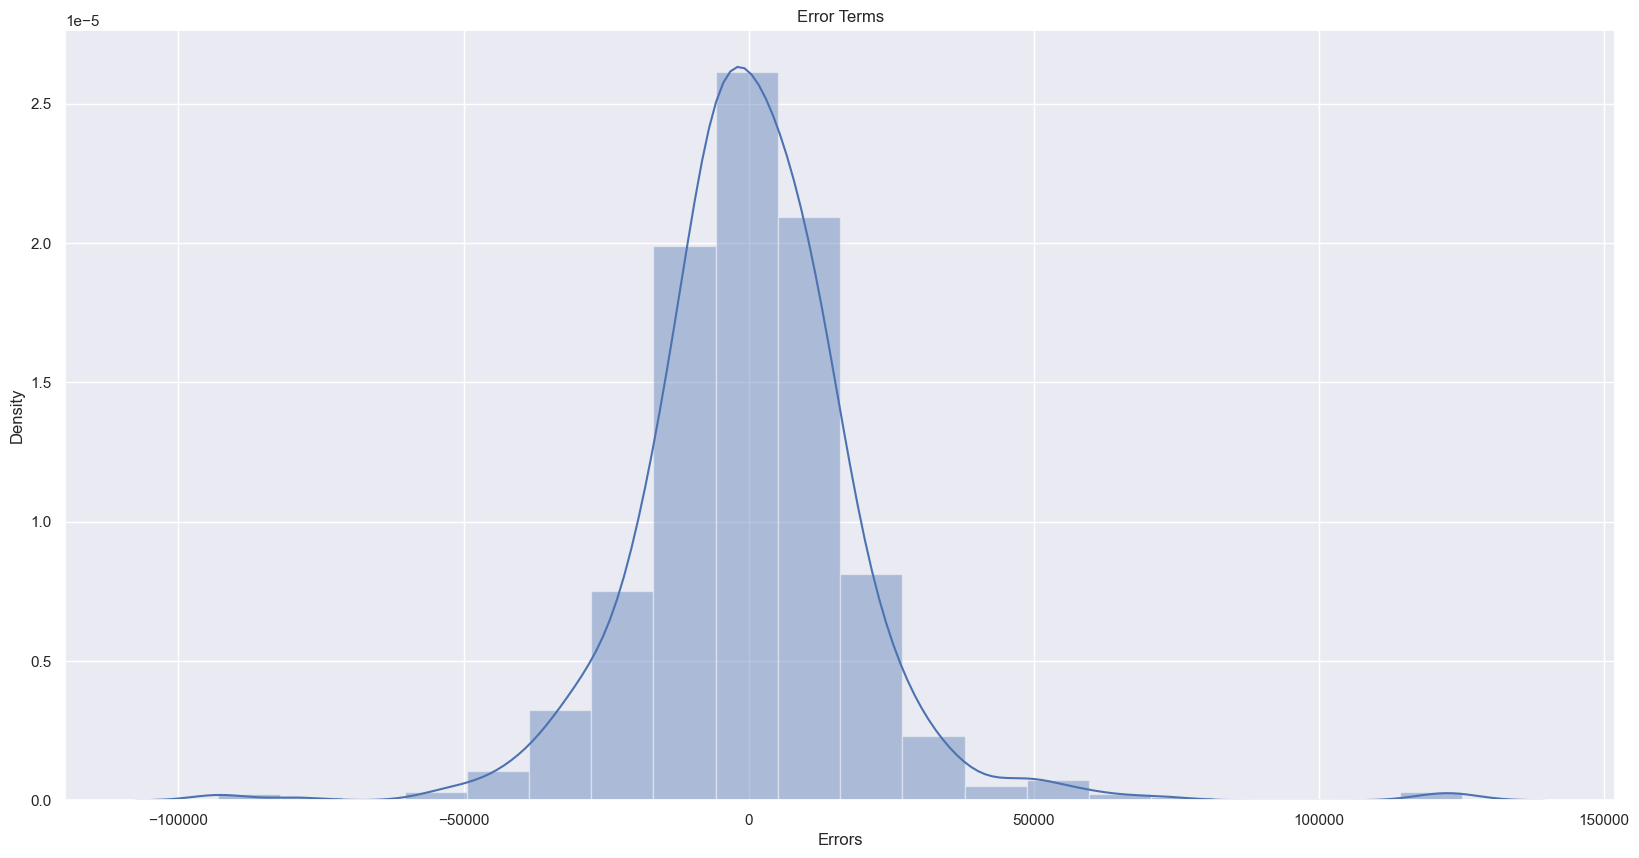

In [221]:
#Checking if error terms are normally distributed
plt.figure(figsize=(20, 10))
sns.distplot((y_train - y_pred_train), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')   

We can see error terms are normally distributed

#### Doubling Alpha Value : Lasso

In [222]:
alpha_lasso = alpha_lasso*2
print(alpha_lasso)

double_lasso = Lasso(alpha=alpha_lasso)
        
double_lasso.fit(X_train, y_train) 


200


Lasso(alpha=200)

In [223]:
y_pred_train = double_lasso.predict(X_train)
y_pred_test = double_lasso.predict(X_test)

metric_lasso_double = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train : ",r2_train_lr)
metric_lasso_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test : ",r2_test_lr)
metric_lasso_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum Squared Train : ",rss1_lr)
metric_lasso_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum Squared Test : ",rss2_lr)
metric_lasso_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train:",mse_train_lr)
metric_lasso_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error Test:",mse_test_lr)
metric_lasso_double.append(mse_test_lr**0.5)

R2 Train :  0.9060232384525608
R2 Test :  0.8978563204220386
Residual Sum Squared Train :  353459452064.64685
Residual Sum Squared Test :  169842608196.43506
Mean Squared Error Train: 401658468.2552805
Mean Squared Error Test: 449319069.30273825


In [224]:
lasso_table = {'Metric': ['Train R2 Score','Test R2 Score','Train RSS','Test RSS',
                       'Train MSE','Test MSE']
        }
lasso_metric_fetaures = pd.DataFrame(lasso_table,columns = ['Metric'])
optimalAplha = pd.Series(metric_lasso, name = 'Aplha=100')
doubleAplha = pd.Series(metric_lasso_double, name = 'Aplha=200')
lasso_metric = pd.concat([lasso_metric_fetaures,optimalAplha, doubleAplha], axis = 1)
lasso_metric

Metric     Aplha=100     Aplha=200
0  Train R2 Score  9.183758e-01  9.060232e-01
1   Test R2 Score  9.055086e-01  8.978563e-01
2       Train RSS  3.069996e+11  3.534595e+11
3        Test RSS  1.571186e+11  1.698426e+11
4       Train MSE  1.867788e+04  2.004142e+04
5        Test MSE  2.038768e+04  2.119715e+04

### Important Predictor Variables

In [225]:
# Using Ridge with optimal alpha
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas.sort_values(by=['Ridge'], ascending=False).head(10)

Ridge
GrLivArea             80065.656814
OverallQual           51498.783365
BsmtFinSF1            45229.489226
TotalBsmtSF           44475.307495
2ndFlrSF              35215.839351
OverallCond           29311.311572
GarageArea            28820.050507
Neighborhood_StoneBr  22649.638400
Fireplaces            21694.203004
BsmtUnfSF             19502.618612

In [226]:
# Ridge with double alpha value
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge Doubled'] = double_ridge.coef_
betas.sort_values(by=['Ridge Doubled'], ascending=False).head(10)

Ridge Doubled
GrLivArea              64276.559169
OverallQual            47470.779815
BsmtFinSF1             40229.743688
TotalBsmtSF            39102.890546
2ndFlrSF               30852.751332
GarageArea             27428.544643
OverallCond            25021.589227
Neighborhood_StoneBr   19532.328532
Fireplaces             18921.895523
BsmtUnfSF              18254.784475

In [227]:
# Lasso with optimal alpha value
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(10)

Lasso
GrLivArea             147390.030211
OverallQual            70499.795471
TotalBsmtSF            58487.851017
OverallCond            33672.600417
BsmtFinSF1             30696.626911
GarageArea             27109.385078
SaleType_New           21563.122267
Neighborhood_StoneBr   19756.002698
Neighborhood_Crawfor   19205.211785
BsmtExposure_Gd        15433.762432

In [228]:
# Lasso with double alpha value
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso Doubled'] = double_lasso.coef_
betas.sort_values(by=['Lasso Doubled'], ascending=False).head(10)

Lasso Doubled
GrLivArea             148501.534617
OverallQual            80879.639998
TotalBsmtSF            49654.761389
BsmtFinSF1             33342.543369
OverallCond            30243.585788
GarageArea             27602.268012
SaleType_New           20936.057504
Neighborhood_Crawfor   15410.699555
BsmtExposure_Gd        14767.665408
Neighborhood_Somerst   11271.744265

### Linear Regression, Ridge and Lasso analysis

In [229]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['Train R2 Score','Test R2 Score','Train RSS','Test RSS',
                       'Train MSE','Test MSE'], 
        'Linear Regression': lr_metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  Train R2 Score       9.417435e-01      9.269326e-01      9.183758e-01
1   Test R2 Score      -3.415023e+17      8.923161e-01      9.055086e-01
2       Train RSS       2.191108e+11      2.748163e+11      3.069996e+11
3        Test RSS       5.678436e+29      1.790547e+11      1.571186e+11
4       Train MSE       1.577940e+04      1.767177e+04      1.867788e+04
5        Test MSE       3.875863e+13      2.176442e+04      2.038768e+04

### Observation :
####  From above table we can see <br> <br> -  Lasso and Ridge performed well compared to Lasso Rgression <br> <br>-  Lasso Regression performed slightly better compared to Ridge Regression as the difference between R2 value of Train and Test data is less <br> <br>- RSS and MSE value of Ridge and Lasso is better than Linear regression


#### Comparing the coefficients

In [230]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(100)

Linear         Ridge          Lasso
MSSubClass           -1.523425e+04 -14014.054823  -20045.200023
LotFrontage           3.434595e+03  12243.294230    8686.822041
LotArea               1.031502e+05  19324.600787       0.000000
OverallQual           4.899241e+04  51498.783365   70499.795471
OverallCond           3.616184e+04  29311.311572   33672.600417
MasVnrArea           -1.426786e+03    907.797189       0.000000
BsmtFinSF1           -2.261169e+16  45229.489226   30696.626911
BsmtFinSF2           -1.841416e+16  13996.785130       0.000000
BsmtUnfSF            -2.550998e+16  19502.618612      -0.000000
TotalBsmtSF           3.997646e+16  44475.307495   58487.851017
2ndFlrSF              1.956497e+04  35215.839351    6911.417693
LowQualFinSF         -2.564938e+02   9143.835282      -0.000000
GrLivArea             1.578116e+05  80065.656814  147390.030211
BsmtFullBath          4.948826e+03   9444.901334    5844.157965
BsmtHalfBath          9.095781e+01  -4403.800579      -0.000000
FullBath              1.959889e+03  13068.312042      -0.000000
HalfBath              1.582518e+03   7837.834370    2681.396453
BedroomAbvGr         -2.283334e+04  -4916.659995    -493.589737
KitchenAbvGr         -1.745845e+04  -8168.625141   -5490.349699
Fireplaces            2.043606e+04  21694.203004   12146.676794
GarageArea            2.355654e+04  28820.050507   27109.385078
WoodDeckSF            1.114092e+04  14234.475755   12360.379719
OpenPorchSF           8.319483e+03  12932.083236    4948.663659
EnclosedPorch         1.079638e+04   8033.001414    1061.260330
ScreenPorch           1.181275e+04  17883.436439   13531.676954
YrSold               -2.264310e+03  -2841.553507   -1061.325577
HouseAge             -5.183706e+04 -18147.599170  -26368.324964
MSZoning_FV           2.620401e+04   5611.943557       0.000000
MSZoning_RH           3.593433e+04   8351.524323       0.000000
MSZoning_RL           3.227188e+04  11420.159505    6735.489347
MSZoning_RM           2.470808e+04   3832.135344      -0.000000
LotShape_IR2          1.549606e+03  10750.327653    9480.946408
LotShape_IR3         -1.069445e+04  -4073.109051      -0.000000
LotShape_Reg          1.154000e+03   -248.555520   -1027.465864
LandContour_HLS       2.153562e+03   4135.656718    3996.181627
LandContour_Low      -3.556250e+03  -3409.032474      -0.000000
LandContour_Lvl      -5.561844e+03  -3500.256936      -0.000000
LotConfig_CulDSac     5.322000e+03   5462.202523    2894.907973
LotConfig_FR2        -1.927500e+03  -3438.777649      -0.000000
LotConfig_FR3        -2.383000e+03  -3334.181741      -0.000000
LotConfig_Inside     -5.460000e+02     23.715597       0.000000
LandSlope_Mod        -3.460250e+03  -3471.747882      -0.000000
LandSlope_Sev        -6.035981e+04 -14216.970571      -0.000000
Neighborhood_BrkSide  9.501500e+03   5911.554305    7111.220002
Neighborhood_ClearCr  2.927188e+02  -3832.117041       0.000000
Neighborhood_CollgCr -7.004500e+03  -6704.437162    -236.574011
Neighborhood_Crawfor  2.375913e+04  17226.601309   19205.211785
Neighborhood_Edwards -7.660000e+03  -7749.619303    -577.286863
Neighborhood_Gilbert -9.932188e+03 -10332.319244   -1188.709013
Neighborhood_IDOTRR   2.530000e+03  -5733.769718      -0.000000
Neighborhood_MeadowV -9.413000e+03 -12049.679788      -0.000000
Neighborhood_Mitchel -1.264350e+04 -10849.172725   -3762.778505
Neighborhood_NAmes   -6.986000e+03  -7758.634598   -1795.342896
Neighborhood_NPkVill  2.512038e+04   4942.908456       0.000000
Neighborhood_NWAmes  -8.183125e+03  -6825.352979    -754.103766
Neighborhood_NoRidge  1.486084e+04  15691.572023    9623.922824
Neighborhood_NridgHt  8.956625e+03  11066.281492   10005.632194
Neighborhood_OldTown -2.198750e+03  -5524.083390      -0.000000
Neighborhood_SWISU   -1.208000e+03  -6710.199594      -0.000000
Neighborhood_Sawyer  -1.718500e+03  -3320.941864       0.000000
Neighborhood_SawyerW -2.336000e+03   -950.933758       0.000000
Neighborhood_Somerst  1.220400e+04  10865.171273   14304.544

### Observation :
#### - We can clearly see the difference in coefficient between Linear, Ridge and Lasso Regression <br> <br> - We observed Lasso is having coefficient as 0 indicating the good candidate for feature elimination

## Conclusion :
#### By Comparing Coefficient of Ridge and Lasso we can conclude below variables play a major role in predicting the House Price
#### The higher values of positive coeeficients suggest a high sale value.

#### Some of the features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  TotalBsmtSF  |  Total square feet of basement area  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  BsmtFinSF1  |  ype 1 finished square feet  |